<a href="https://colab.research.google.com/github/stutkhd/excercise_logistics/blob/master/Nearest_neighbor_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nearest neighbor algorithm

### Nearest neighbor algorithmとは
---

# 第8, 9, 10回. コンペティション用プログラム作成

## 1. 都市集合C
### 1.1 ベンチマーク問題例TSPLIBを使う場合

In [1]:
def strnum_to_num(t):
    num=t.split("e+")
    r=float(num[0])
    if len(num)==2:
        r *= 10**int(num[1])
    return r

def read_tsp_file(instance):
    if instance[:4]=="http":
        import urllib.request
        with urllib.request.urlopen(instance) as f:
            with open('tmp.txt', 'w') as g:
                print(f.read().decode(), file=g)
                instance="tmp.txt"
        
    with open(instance,"r") as f:
        for i in range(6):
            line=f.readline().rstrip("\n")        
        C={}
        for line in f.readlines():
            node=line.rstrip("\n").split()
            name=node[0]            
            if name == "EOF":
                break
            if node[0]=='NODE_COORD_SECTION':
                continue
            x,y=strnum_to_num(node[1]),strnum_to_num(node[2])
            C[name]=(x,y)
        return C
    
instance="http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/ch130.tsp"
C=read_tsp_file(instance)

### 1.2 ランダムなデータを使う場合

In [15]:
C={}
n=10
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)

In [16]:
C

{0: (1333, 3179),
 1: (1318, 7535),
 2: (7625, 9495),
 3: (7016, 9684),
 4: (1733, 9545),
 5: (5962, 6042),
 6: (6253, 5705),
 7: (1124, 9116),
 8: (7869, 3951),
 9: (9347, 6891)}

## 2. distanceとgraph_of_tourの定義

In [3]:
def distance(pa,pb):
    return ((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)**0.5

import networkx as nx

def graph_of_tour(tour):
    Gt=nx.Graph()

    for i in range(len(tour)):
        ci=tour[i]
        if i == len(tour)-1:
            cj=tour[0]
        else:
            cj=tour[i+1]        
        Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
    return Gt

## 3. アルゴリズム

提出してもらったみなさんのプログラムはtsp_solveから実行します．制限時間で止まるようしておいてください．

In [27]:
import time

def NN(C, G):
    #一度行った場所にはいかないようにする
    tour = [0]
    visited = {0:True}
    #tourが都市の数と等しくなるまで近いところを行くようにする
    while len(tour) < len(C):
        min_d, min_u = 10**8, None
        v = tour[-1]
        for u in G[v]:
            if min_d > G[v][u]["weight"] and u not in visited:
                min_d = G[v][u]["weight"]
                min_u = u
        visited[min_u] = True
        tour.append(min_u)
    return tour

def tsp_solve(C,timelimit=500):
    ''' TSPを解くためのプログラム
    input: 都市集合C, 制限時間timelimit(秒)
    output: 巡回路
    '''
    G = nx.Graph()
    for v in C:
        G.add_node(v)
    for i, ci in enumerate(C):
        for j, cj in enumerate(C):
            if i < j:
                G.add_edge(ci,cj, weight=distance(C[ci], C[cj]))
    starttime=time.time()
    while time.time() - starttime < timelimit:
        tour = NN(C, G)

    return tour

tour=tsp_solve(C,5)

## 4. 解tourの描画と実行可能性

size of tour: 27301.80722834746
feasibility: True


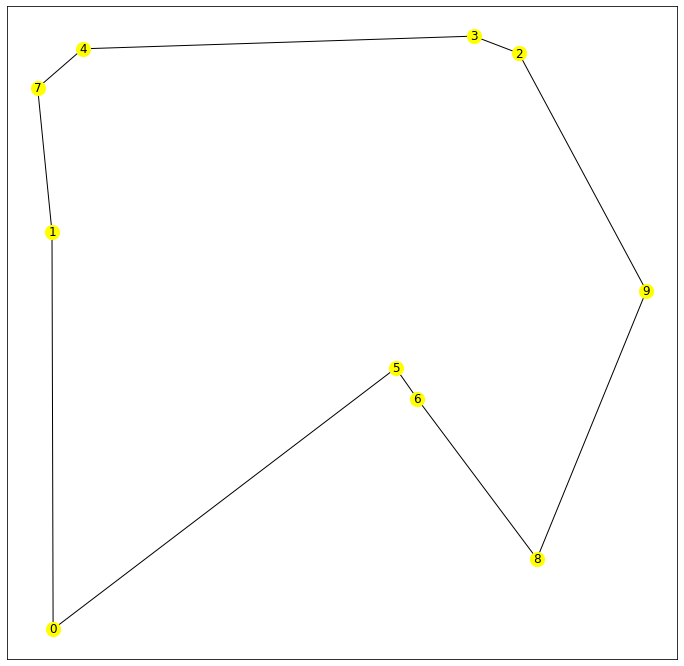

In [28]:
Gt=graph_of_tour(tour)
print('size of tour:', Gt.size(weight='weight'))
print('feasibility:',nx.is_k_edge_connected(Gt,2))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(Gt,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1,axis="equal")
plt.show() 

Nearest Neighbor 

In [21]:
#すべてのノードがつながってる　全結合
# graph of tour だと人筆書き

#グラフの作成
G = nx.Graph()

#グラフに各都市の座標を追加
for v in C:
    G.add_node(v)

#枝を追加
for i, ci in enumerate(C):
    for j, cj in enumerate(C):
        if i < j:
            G.add_edge(ci,cj, weight=distance(C[ci], C[cj]))

In [24]:
#vから一番近い点を求める
v = 0
min_d, min_u = 10**8, None

for u in G[v]:
    #G[v][u]はv→uのdistance(weight)を表示
    # print(u, G[v][u]["weight"])
    if min_d > G[v][u]["weight"]:
        min_d = G[v][u]["weight"]
        min_u = u
print(min_d, min_u)

1 1992.684872226414
2 8166.305223294069
3 7118.613137402537
4 4713.687516159721
5 6989.467647825548
6 3829.6323583341523
7 7193.7128800084865
8 7419.593856809145
9 8830.859754293462
1992.684872226414 1


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


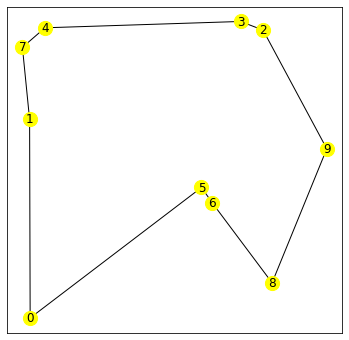

In [26]:
def NN(C, G):
    #一度行った場所にはいかないようにする
    tour = [0]
    visited = {0:True}

    #tourが都市の数と等しくなるまで近いところを行くようにする
    while len(tour) < len(C):
        min_d, min_u = 100000000, None
        v = tour[-1]
        for u in G[v]:
            if min_d > G[v][u]["weight"] and u not in visited:
                min_d = G[v][u]["weight"]
                min_u = u
        visited[min_u] = True
        tour.append(min_u)
    return tour

#G = nx.Digraph()
G = nx.Graph()

for v in C:
    G.add_node(v)
for i, ci in enumerate(C):
    for j, cj in enumerate(C):
        if i < j:
            G.add_edge(ci, cj, weight=distance(C[ci], C[cj]))
print(G.nodes)
tour = NN(C, G)
Gt = graph_of_tour(tour)
plt.figure(figsize=(6, 6))
nx.draw_networkx(Gt,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1,axis="equal")
plt.show()

In [24]:
for u in G[v]:
    print(u)

0
1
2
3
4
5
6
7
8
